In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from scipy.optimize import curve_fit
import mpltex

%matplotlib notebook

In [12]:
def tf_by_td_inertial(tm_by_td,tg_by_td,U0):
    
    return (np.exp(U0)/U0)*(tm_by_td+ 4*U0*(tg_by_td)**2)


def tf_by_td_overdamped(tm_by_td,tg_by_td,U0):
    
    return (np.exp(U0)/U0)*(2*np.sqrt(U0*tm_by_td) + ((np.pi/(2*np.sqrt(2)))/(1+10*U0*tg_by_td)))

def tf_by_td_new(tm_by_td,tg1_by_td,tg2_by_td,td1_by_td,U0):
    td2_by_td = 1.-td1_by_td

    
    Inertial_Denominator = 1./( tf_by_td_inertial(tm_by_td,tg1_by_td,U0 )*(1./td1_by_td )) + \
                    1./( tf_by_td_inertial(tm_by_td,tg2_by_td,U0)*(1./td2_by_td ) )
    Overdamped = td1_by_td*tf_by_td_overdamped(tm_by_td,tg1_by_td,U0 ) + \
                    td2_by_td*tf_by_td_overdamped(tm_by_td,tg2_by_td,U0 )
    
    value = Overdamped + 1./Inertial_Denominator
    return value

def tf_by_td(tm_by_td,tg_by_td,U0=3.):
    return (np.exp(U0)/U0)*(2*np.sqrt(U0*tm_by_td) + tm_by_td+ 4*U0*(tg_by_td)**2+
                            ((np.pi/2+np.sqrt(2))/(1+10*U0*tg_by_td)))



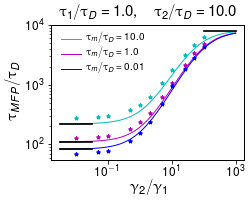

In [13]:
xm = np.genfromtxt('G1G2Tg11Tg210.txt').T

x_Theorym = np.logspace(-2.5,3)
y_Theory01 = np.zeros_like(x_Theorym)
y_Theory1 = np.zeros_like(x_Theorym)
y_Theory10 = np.zeros_like(x_Theorym)
#
tg1_by_tdm = 1.
tg2_by_tdm = 10.
tm_by_td01 = 0.01
tm_by_td1 = 1.
tm_by_td10 = 10.
#
    
x1m = np.linspace(80, 250, 10)
x3m = np.logspace(2, 3, 10)
x2m = np.logspace(-2.5, -1.5, 10)
y11m=np.full(x1m.shape,tf_by_td(tm_by_td1,tg1_by_tdm,3))   
y21m=np.full(x1m.shape,tf_by_td(tm_by_td1,tg2_by_tdm,3))   
y12m=np.full(x1m.shape,tf_by_td(tm_by_td01,tg1_by_tdm,3))   
y22m=np.full(x1m.shape,tf_by_td(tm_by_td01,tg2_by_tdm,3))   
y13m=np.full(x1m.shape,tf_by_td(tm_by_td10,tg1_by_tdm,3))   
y23m=np.full(x1m.shape,tf_by_td(tm_by_td10,tg2_by_tdm,3))   

for i,e in enumerate(x_Theorym):
    
    td1_by_tdm = 1./(1.+e)
    y_Theory01[i] = tf_by_td_new(tm_by_td01,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory1[i] = tf_by_td_new(tm_by_td1,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory10[i] = tf_by_td_new(tm_by_td10,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)


@mpltex.acs_decorator
def my_plot(x_Theorym):
    fig, ax = plt.subplots(1,1)
    ax.plot(x_Theorym,y_Theory10,'c', label= '$\\tau_m/\\tau_D = 10.0$')
    ax.plot(x_Theorym,y_Theory1,'m', label= '$\\tau_m/\\tau_D = 1.0$ ',)
    ax.plot(x_Theorym,y_Theory01,'b', label= '$\\tau_m/\\tau_D = 0.01$',)

    ax.tick_params(axis='both')
    ax.plot(xm[0],xm[3],'c*')#, label= '$\\tau_m/\\tau_D = 10.0$ Simulation')
    ax.plot(xm[0],xm[2],'m*')#, label= '$\\tau_m/\\tau_D = 1.0$ Simulation')
    ax.plot(xm[0],xm[1],'b*')#, label= '$\\tau_m/\\tau_D = 0.1$ Simulation')

    ax.plot(x2m,y11m,'k', linewidth=1.7)
    ax.plot(x3m,y21m,'k', linewidth=1.7)
    ax.plot(x2m,y12m,'k', linewidth=1.7)
    #ax.plot(x3m,y22m,'k', linewidth=2)
    ax.plot(x2m,y13m,'k', linewidth=1.7)
    #ax.plot(x3m,y23m,'k', linewidth=2)

    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title('$\\tau_1/\\tau_D = 1.0, \quad \\tau_2/\\tau_D = 10.0 $',size=15)
    plt.xlabel('$\\gamma_2/\\gamma_1$',size=15)
    plt.ylabel('$ \\tau_{MFP}/ \\tau_D$',size=15)
    ax.legend(loc='upper left', fontsize =10)
    ax.tick_params(axis='both', labelsize=12)
    plt.savefig('newfigure/Articol/Tau11Tau210P.pdf', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
    
my_plot(x_Theorym)   

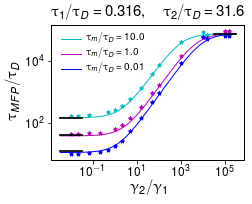

In [14]:
xm = np.genfromtxt('G1G2TG103TG230TM(001-1-10).txt').T

x_Theorym = np.logspace(-2.5,5.5)
y_Theory01 = np.zeros_like(x_Theorym)
y_Theory1 = np.zeros_like(x_Theorym)
y_Theory10 = np.zeros_like(x_Theorym)
#
tg1_by_tdm = 0.316
tg2_by_tdm = 31.6
tm_by_td01 = 0.01
tm_by_td1 = 1.
tm_by_td10 = 10.
#
    
x1m = np.logspace(-2.5, 5, 10)
x3m = np.logspace(4.5, 5.5, 10)
x2m = np.logspace(-2.5, -1.5, 10)
y11m=np.full(x1m.shape,tf_by_td(tm_by_td1,tg1_by_tdm,3))   
y21m=np.full(x1m.shape,tf_by_td(tm_by_td1,tg2_by_tdm,3))   
y12m=np.full(x1m.shape,tf_by_td(tm_by_td01,tg1_by_tdm,3))   
y22m=np.full(x1m.shape,tf_by_td(tm_by_td01,tg2_by_tdm,3))   
y13m=np.full(x1m.shape,tf_by_td(tm_by_td10,tg1_by_tdm,3))   
y23m=np.full(x1m.shape,tf_by_td(tm_by_td10,tg2_by_tdm,3))   

for i,e in enumerate(x_Theorym):
    
    td1_by_tdm = 1./(1.+e)
    y_Theory01[i] = tf_by_td_new(tm_by_td01,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory1[i] = tf_by_td_new(tm_by_td1,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)
    y_Theory10[i] = tf_by_td_new(tm_by_td10,tg1_by_tdm,tg2_by_tdm,td1_by_tdm,3)


@mpltex.acs_decorator
def my_plot2(x_Theorym):
    fig, ax = plt.subplots(1,1)
    ax.plot(x_Theorym,y_Theory10,'c', label= '$\\tau_m/\\tau_D = 10.0$')
    ax.plot(x_Theorym,y_Theory1,'m', label= '$\\tau_m/\\tau_D = 1.0$ ',)
    ax.plot(x_Theorym,y_Theory01,'b', label= '$\\tau_m/\\tau_D = 0.01$',)

    ax.tick_params(axis='both')
    ax.plot(xm[0],xm[3],'c*')#, label= '$\\tau_m/\\tau_D = 10.0$ Simulation')
    ax.plot(xm[0],xm[2],'m*')#, label= '$\\tau_m/\\tau_D = 1.0$ Simulation')
    ax.plot(xm[0],xm[1],'b*')#, label= '$\\tau_m/\\tau_D = 0.1$ Simulation')

    ax.plot(x2m,y11m,'k', linewidth=1.7)
    ax.plot(x3m,y21m,'k', linewidth=1.7)
    ax.plot(x2m,y12m,'k', linewidth=1.7)
    #ax.plot(x3m,y22m,'k', linewidth=2)
    ax.plot(x2m,y13m,'k', linewidth=1.7)
    #ax.plot(x3m,y23m,'k', linewidth=2)

    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title('$\\tau_1/\\tau_D = 0.316, \quad \\tau_2/\\tau_D = 31.6 $',size=15)
    plt.xlabel('$\\gamma_2/\\gamma_1$',size=15)
    plt.ylabel('$ \\tau_{MFP}/ \\tau_D$',size=15)
    ax.legend(loc='upper left', fontsize=10)
    ax.tick_params(axis='both', labelsize=12)
    plt.savefig('newfigure/Articol/Tau103Tau230P.pdf', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
    
my_plot2(x_Theorym)   

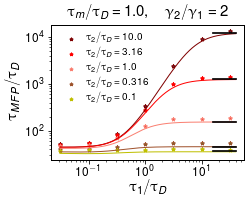

In [15]:
a= np.loadtxt("G12G2tG1(003-01-03-1-3-10-31)tG2(01-03-1-3-10)tM1.txt")
a[:,0]
a1=(a[0,1],a[1,1],a[2,1],a[3,1],a[4,1],a[5,1],a[6,1])
a2=(a[0,2],a[1,2],a[2,2],a[3,2],a[4,2],a[5,2],a[6,2])
a3=(a[0,3],a[1,3],a[2,3],a[3,3],a[4,3],a[5,3],a[6,3])
a4=(a[0,4],a[1,4],a[2,4],a[3,4],a[4,4],a[5,4],a[6,4])
a5=(a[0,5],a[1,5],a[2,5],a[3,5],a[4,5],a[5,5],a[6,5])

x1 = np.logspace(1.2,1.6, 10)
x2 = np.logspace(-1.5, -1., 10)
tg1_by_td = np.logspace(-1.5, 1.6, 1000)
tg21_by_td = 0.1
tg22_by_td = 0.316
tg23_by_td = 1.
tg24_by_td = 3.16
tg25_by_td = 10.
U0=3

td1_by_td=1./3
td2_by_td=1.-td1_by_td
tm_by_td=1.


####Devo considerare tg/td_i=(gamma/gamma_i)tg/td perche` td_i = (gamma_i/gamma)td 
####e lo stesso per tm/td  tm_i/td_i = (gamma^2/gamma_i^2)tm/td
tg1_by_td1 = 0.05*(1/td1_by_td)
tg21_by_td2 = 0.1*(1/td2_by_td)
tg22_by_td2 = 0.316*(1/td2_by_td)
tg23_by_td2 = 1.0*(1/td2_by_td)
tg24_by_td2 = 3.16*(1/td2_by_td)
tg25_by_td2 = 10.*(1/td2_by_td)
tm_by_td1 = tm_by_td*((1/td1_by_td)**2)
tm_by_td2 = tm_by_td*((1/td2_by_td)**2)
#
y1=np.full(x2.shape,td1_by_td*tf_by_td(tm_by_td1,tg1_by_td1,3))
y21=np.full(x1.shape,td2_by_td*tf_by_td(tm_by_td2,tg21_by_td2,3))
y22=np.full(x1.shape,td2_by_td*tf_by_td(tm_by_td2,tg22_by_td2,3))
y23=np.full(x1.shape,td2_by_td*tf_by_td(tm_by_td2,tg23_by_td2,3))
y24=np.full(x1.shape,td2_by_td*tf_by_td(tm_by_td2,tg24_by_td2,3))
y25=np.full(x1.shape,td2_by_td*tf_by_td(tm_by_td2,tg25_by_td2,3))


tmf1=np.full(tg1_by_td.shape,tf_by_td_new(tm_by_td,tg1_by_td,tg21_by_td,td1_by_td,U0))
tmf2=np.full(tg1_by_td.shape,tf_by_td_new(tm_by_td,tg1_by_td,tg22_by_td,td1_by_td,U0))
tmf3=np.full(tg1_by_td.shape,tf_by_td_new(tm_by_td,tg1_by_td,tg23_by_td,td1_by_td,U0))
tmf4=np.full(tg1_by_td.shape,tf_by_td_new(tm_by_td,tg1_by_td,tg24_by_td,td1_by_td,U0))
tmf5=np.full(tg1_by_td.shape,tf_by_td_new(tm_by_td,tg1_by_td,tg25_by_td,td1_by_td,U0))


@mpltex.acs_decorator
def my_plot3(tg1_by_td):
    fig, ax = plt.subplots(1,1)    

    ax.loglog(a[:,0],a5,markeredgecolor='maroon', marker='*', linestyle="None",label='$\\tau_2/\\tau_D=10.0$')
    ax.loglog(a[:,0],a4,'*r',label='$\\tau_2/\\tau_D=3.16$')
    ax.loglog(a[:,0],a3,markeredgecolor='salmon', marker='*', linestyle="None",label='$\\tau_2/\\tau_D=1.0$')
    ax.loglog(a[:,0],a2,markeredgecolor='sienna', marker='*', linestyle="None",label='$\\tau_2/\\tau_D=0.316$')
    ax.loglog(a[:,0],a1,'*y',label='$\\tau_2/\\tau_D=0.1$')

    ax.loglog(tg1_by_td,tmf5,'maroon')
    ax.loglog(tg1_by_td,tmf4,'r')
    ax.loglog(tg1_by_td,tmf3,'salmon')
    ax.loglog(tg1_by_td,tmf2,'sienna')
    ax.loglog(tg1_by_td,tmf1,'y')

    #ax.plot(x2,y1,'k')
    ax.plot(x1,y21,'k', linewidth=1.7)
    ax.plot(x1,y22,'k', linewidth=1.7)
    ax.plot(x1,y23,'k', linewidth=1.7)
    ax.plot(x1,y24,'k', linewidth=1.7)
    ax.plot(x1,y25,'k', linewidth=1.7)

    ax.set_xlabel("$\\tau_{1}/\\tau_D$",size=15)
    ax.set_ylabel("$\\tau_{MFP}/\\tau_D$",size=15)
    plt.title('$\\tau_m/\\tau_D = 1.0, \quad \\gamma_2/\\gamma_1 = 2 $',size=15)
    ax.legend(loc='upper left', fontsize=10)
    ax.tick_params(axis='both', labelsize=12)
    plt.savefig('newfigure/Articol/Tau2P.pdf', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)

my_plot3(tg1_by_td)  

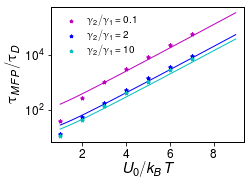

In [11]:
x = np.genfromtxt('U(1-2-3-4-5-6-7)G1G2(0,1-2-10-100).txt').T

y=(1,2,3,4,5,6,7)

x_Theory = np.linspace(1,9)
y_Theory01 = np.zeros_like(x_Theory)
y_Theory2 = np.zeros_like(x_Theory)
y_Theory100 = np.zeros_like(x_Theory)
#
tg1_by_td = 10.
tg2_by_td = 1.
tm_by_td = 1.

td1_by_td_10=1./101
td1_by_td_2=1./3
td1_by_td_01=10./11
    
for i,e in enumerate(x_Theory):
    y_Theory01[i] = tf_by_td_new(tm_by_td,tg1_by_td,tg2_by_td,td1_by_td_01,e)
    y_Theory2[i] = tf_by_td_new(tm_by_td,tg1_by_td,tg2_by_td,td1_by_td_2,e)
    y_Theory10[i] = tf_by_td_new(tm_by_td,tg1_by_td,tg2_by_td,td1_by_td_10,e)

@mpltex.acs_decorator
def my_plot3(x_Theory):
    fig, ax = plt.subplots(1,1)
    ax.plot(x_Theory,y_Theory01,'m')
    ax.plot(x_Theory,y_Theory2,'b')
    ax.plot(x_Theory,y_Theory10,'c')

    ax.plot(y,x[1,:],'*m',label= '$\\gamma_2/\\gamma_1 = 0.1$')
    ax.plot(y,x[2,:],'*b',label= '$\\gamma_2/\\gamma_1 = 2$')
    ax.plot(y,x[3,:],'*c',label= '$\\gamma_2/\\gamma_1 = 10$')
    
    
    ax.set_xlabel("$U_0/k_BT$", size=15)
    ax.set_ylabel("$\\tau_{MFP}/\\tau_D$", size=15)
    ax.legend(loc='upper left', fontsize=10)
    ax.set_yscale('log')
    ax.tick_params(axis='both', labelsize=12)
    
    plt.savefig('newfigure/Articol/U.pdf', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
    
my_plot3(x_Theory)